In [9]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten , BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import keras.regularizers as regularizers
import os

batch_size = 128
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
weight_decay = 1e-4

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')[0:20000]
y_train = y_train[0:20000]
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay),
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Conv2D(128, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(num_classes))
model.add(Activation('softmax'))


opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    datagen = ImageDataGenerator(
        rotation_range=0, 
        # width_shift_range=0.1,
        # height_shift_range=0.1,
        shear_range=0.,  
        zoom_range=0.,  
        channel_shift_range=0.,
        # fill_mode='nearest',
        cval=0.,  
        horizontal_flip=True,
        # vertical_flip=True, 
        )

    datagen.fit(x_train)

    history = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using real-time data augmentation.
Epoch 1/100
157/157 [==============================] - 8s 53ms/step - loss: 2.3147 - accuracy: 0.3454 - val_loss: 3.1027 - val_accuracy: 0.1098
Epoch 2/100
157/157 [==============================] - 7s 46ms/step - loss: 1.6721 - accuracy: 0.4694 - val_loss: 3.3516 - val_accuracy: 0.1774
Epoch 3/100
157/157 [==============================] - 7s 46ms/step - loss: 1.4150 - accuracy: 0.5380 - val_loss: 2.2941 - val_accuracy: 0.3391
Epoch 4/100
157/157 [==============================] - 7s 47ms/step - loss: 1.2801 - accuracy: 0.5889 - val_loss: 1.4057 - val_accuracy: 0.5369
Epoch 5/100
157/157 [==============================] - 7s 46ms/step - loss: 1.1816 - accuracy: 0.6216 - val_loss: 1.0366 - val_accuracy: 0.6556
Epoch 6/100
157/157 [==============================] - 7s 46ms/step - loss: 1.0753 - accuracy: 0.6497 - val_loss: 0.9928 - val_accuracy: 0.6735
Epoch 7/100
157/157 [==============================] - 7s 46ms/step - loss: 0.9894 - accuracy: 0.6780

Text(0.5, 1.0, 'Training and Testing loss')

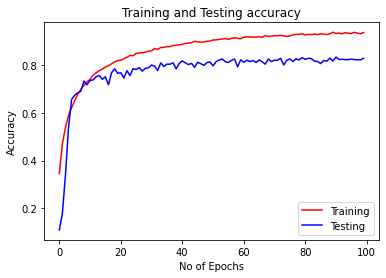

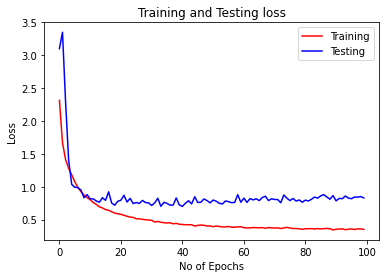

In [10]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs, acc, 'r',label='Training')
plt.plot(epochs, val_acc, 'b',label ='Testing')
plt.title('Training and Testing accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'r',label='Training')
plt.plot(epochs, val_loss, 'b',label='Testing')
plt.xlabel("No of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title('Training and Testing loss')

